# K-Means Clustering
## Fans

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy as sp
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import MinMaxScaler

In [98]:
df_fans = pd.read_csv("fans_clean.csv")
df_interactions = pd.read_csv("interactions_1.csv")
df_fans.head()
df_interactions
df_fans

,Unnamed: 0,userId,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,...,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor
0,0,barcafans-50b1b048-3075-445e-ac88-f54c17a4a665,2,9,1.0,0.0,0,3.0,0,0,...,0,0,0,1,1.549370e+09,1.578682e+09,1.585936e+09,1.609583e+09,0,0
1,1,barcafans-39fbdac7-3276-4713-9006-9af6f3f5a245,2,20,3.0,0.0,0,88.0,0,0,...,0,0,0,1,1.538698e+09,1.613557e+09,1.585937e+09,1.613725e+09,0,0
2,2,barcafans-c35449a8-9a0d-4278-8082-aaac144048f8,2,10,3.0,0.0,0,158.0,0,0,...,0,0,0,0,1.526256e+09,1.549498e+09,1.585937e+09,1.609583e+09,0,0
3,3,barcafans-46a0cca9-61ae-415f-96af-5cb635e742c8,2,9,1.0,1.0,0,3.0,0,0,...,0,0,0,1,1.551678e+09,1.607535e+09,1.585938e+09,1.613491e+09,0,0
4,4,barcafans-cd6758db-1b67-4d25-a111-bb1909ea0229,2,4,3.0,0.0,0,1250.0,0,0,...,0,0,0,1,1.540339e+09,1.592840e+09,1.585938e+09,1.613491e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,32892,barcafans-e53c9186-a725-423f-bff7-2e24c28bfa96,9,9,1.0,1.0,0,0.0,1,0,...,0,0,0,0,1.613612e+09,1.613613e+09,1.613724e+09,1.613726e+09,1,0
32893,32893,barcafans-f71df868-0b56-4ce9-b236-e944dd90a516,9,9,2.0,0.0,0,0.0,0,0,...,0,0,0,1,1.613672e+09,1.613672e+09,1.613724e+09,1.613726e+09,1,0
32894,32894,barcafans-f8094f39-90e1-4aea-a873-812a2537a5d2,9,9,1.0,1.0,0,0.0,0,0,...,0,0,0,1,1.613656e+09,1.613656e+09,1.613724e+09,1.613726e+09,0,0
32895,32895,barcafans-fb6a9f4c-cc09-46e0-bb83-9cbfd92820ff,9,9,1.0,1.0,0,0.0,0,0,...,0,0,0,1,1.613616e+09,1.613617e+09,1.613724e+09,1.613726e+09,0,0


In [99]:
df_fans['userId'].value_counts()[126:]

barcafans-a1ae22e0-6fda-47be-af2e-d73367493ce3    1
barcafans-d9c80a94-4aa4-4721-8f94-8cc2bd58a10e    1
barcafans-55053d94-08e9-447a-a394-7855ab1ade92    1
barcafans-0d6bc9de-093f-42fd-93e0-534e883b8d02    1
barcafans-9fd7b183-93c0-439a-86e3-32d12f3d9d30    1
                                                 ..
barcafans-371bb68e-da0b-4575-93c4-3d47d1d6707a    1
barcafans-fa180a03-8f10-435a-b04d-7b4e6a271cb0    1
barcafans-c63c40ae-c173-4aff-947a-527cb8f4eba3    1
barcafans-a6322e45-1448-427b-a8c4-0ada40e1b5f6    1
barcafans-73bb4312-a21f-412e-8267-1e67e83970e9    1
Name: userId, Length: 32643, dtype: int64

In [100]:
is_in = df_fans['userId'].value_counts()[126:].index

In [101]:
df_fans = df_fans[df_fans['userId'].isin(is_in)]
df_fans

,Unnamed: 0,userId,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,...,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor
0,0,barcafans-50b1b048-3075-445e-ac88-f54c17a4a665,2,9,1.0,0.0,0,3.0,0,0,...,0,0,0,1,1.549370e+09,1.578682e+09,1.585936e+09,1.609583e+09,0,0
1,1,barcafans-39fbdac7-3276-4713-9006-9af6f3f5a245,2,20,3.0,0.0,0,88.0,0,0,...,0,0,0,1,1.538698e+09,1.613557e+09,1.585937e+09,1.613725e+09,0,0
2,2,barcafans-c35449a8-9a0d-4278-8082-aaac144048f8,2,10,3.0,0.0,0,158.0,0,0,...,0,0,0,0,1.526256e+09,1.549498e+09,1.585937e+09,1.609583e+09,0,0
3,3,barcafans-46a0cca9-61ae-415f-96af-5cb635e742c8,2,9,1.0,1.0,0,3.0,0,0,...,0,0,0,1,1.551678e+09,1.607535e+09,1.585938e+09,1.613491e+09,0,0
4,4,barcafans-cd6758db-1b67-4d25-a111-bb1909ea0229,2,4,3.0,0.0,0,1250.0,0,0,...,0,0,0,1,1.540339e+09,1.592840e+09,1.585938e+09,1.613491e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,32892,barcafans-e53c9186-a725-423f-bff7-2e24c28bfa96,9,9,1.0,1.0,0,0.0,1,0,...,0,0,0,0,1.613612e+09,1.613613e+09,1.613724e+09,1.613726e+09,1,0
32893,32893,barcafans-f71df868-0b56-4ce9-b236-e944dd90a516,9,9,2.0,0.0,0,0.0,0,0,...,0,0,0,1,1.613672e+09,1.613672e+09,1.613724e+09,1.613726e+09,1,0
32894,32894,barcafans-f8094f39-90e1-4aea-a873-812a2537a5d2,9,9,1.0,1.0,0,0.0,0,0,...,0,0,0,1,1.613656e+09,1.613656e+09,1.613724e+09,1.613726e+09,0,0
32895,32895,barcafans-fb6a9f4c-cc09-46e0-bb83-9cbfd92820ff,9,9,1.0,1.0,0,0.0,0,0,...,0,0,0,1,1.613616e+09,1.613617e+09,1.613724e+09,1.613726e+09,0,0


In [102]:
df_fans['userId'].nunique()

32643

In [103]:
df_fans['userId']=='barcafans-cc865e0e-ab64-469c-bebf-1bb0b3944bf1'
df_fans[df_fans['userId']=='barcafans-cc865e0e-ab64-469c-bebf-1bb0b3944bf1']

,Unnamed: 0,userId,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,...,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor


In [104]:
df_fans = df_fans[df_fans['subscriptor']==1]

In [105]:
print(df_fans.columns.tolist())

['Unnamed: 0', 'userId', 'FFA_FIRST_SOURCE_ID', 'FFA_LAST_SOURCE_ID', 'FFA_FSB_ID', 'FFA_EMAIL_STATUS_ACTIVO', 'FFA_VIP', 'FFA_TIME_ON_PLATORM', 'SPA', 'CAT', 'FRA', 'JAP', 'ARA', 'otherLanguages', 'F', 'M', 'userAge', 'US', 'ES', 'IN', 'MX', 'NG', 'GB', 'GH', 'FR', 'CA', 'CO', 'NL', 'GT', 'DE', 'SE', 'ZA', 'PE', 'ID', 'AU', 'DK', 'CH', 'otherCountries', 'FFA_SIGNUP_DATE', 'FFA_LAST_DATE', 'FFA_CREATED_AT', 'FFA_UPDATED_AT', 'APP', 'subscriptor']


In [106]:
df_fans.shape

(6172, 44)

In [107]:
df_fans.count()

Unnamed: 0                 6172
userId                     6172
FFA_FIRST_SOURCE_ID        6172
FFA_LAST_SOURCE_ID         6172
FFA_FSB_ID                 6172
FFA_EMAIL_STATUS_ACTIVO    6172
FFA_VIP                    6172
FFA_TIME_ON_PLATORM        6172
SPA                        6172
CAT                        6172
FRA                        6172
JAP                        6172
ARA                        6172
otherLanguages             6172
F                          6172
M                          6172
userAge                    6172
US                         6172
ES                         6172
IN                         6172
MX                         6172
NG                         6172
GB                         6172
GH                         6172
FR                         6172
CA                         6172
CO                         6172
NL                         6172
GT                         6172
DE                         6172
SE                         6172
ZA      

In [108]:
df_fans.describe()

,Unnamed: 0,FFA_FIRST_SOURCE_ID,FFA_LAST_SOURCE_ID,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,FFA_VIP,FFA_TIME_ON_PLATORM,SPA,CAT,FRA,...,AU,DK,CH,otherCountries,FFA_SIGNUP_DATE,FFA_LAST_DATE,FFA_CREATED_AT,FFA_UPDATED_AT,APP,subscriptor
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,...,6172.000000,6172.000000,6172.000000,6172.000000,6.172000e+03,6.172000e+03,6.172000e+03,6.172000e+03,6172.000000,6172.0
mean,13701.092677,9.636423,9.745949,1.683571,0.414128,0.006319,267.348833,0.237200,0.120868,0.013934,...,0.010369,0.013286,0.014096,0.284835,1.540012e+09,1.599700e+09,1.594420e+09,1.611159e+09,0.245463,1.0
std,8573.555916,9.654056,3.426702,0.929452,0.492611,0.079246,520.474132,0.425401,0.326001,0.117226,...,0.101309,0.114505,0.117896,0.451372,7.013794e+07,1.646354e+07,9.091907e+06,4.606978e+06,0.430396,0.0
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.007078e+09,1.454203e+09,1.578136e+09,1.578824e+09,0.000000,1.0
25%,6172.500000,9.000000,9.000000,1.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.517379e+09,1.595256e+09,1.591149e+09,1.609583e+09,0.000000,1.0
50%,14546.000000,9.000000,9.000000,1.000000,0.000000,0.000000,107.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.551053e+09,1.601171e+09,1.591161e+09,1.609583e+09,0.000000,1.0
75%,20763.250000,9.000000,9.000000,3.000000,1.000000,0.000000,289.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.597968e+09,1.607522e+09,1.599988e+09,1.611310e+09,0.000000,1.0
max,32853.000000,98.000000,92.000000,5.000000,1.000000,1.000000,14301.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.638445e+09,1.638490e+09,1.638446e+09,1.638450e+09,1.000000,1.0


In [109]:
df_fans_clustering = df_fans.drop(['userId', 'Unnamed: 0'], axis=1)

In [110]:
print(df_fans_clustering.columns.to_list())

['FFA_FIRST_SOURCE_ID', 'FFA_LAST_SOURCE_ID', 'FFA_FSB_ID', 'FFA_EMAIL_STATUS_ACTIVO', 'FFA_VIP', 'FFA_TIME_ON_PLATORM', 'SPA', 'CAT', 'FRA', 'JAP', 'ARA', 'otherLanguages', 'F', 'M', 'userAge', 'US', 'ES', 'IN', 'MX', 'NG', 'GB', 'GH', 'FR', 'CA', 'CO', 'NL', 'GT', 'DE', 'SE', 'ZA', 'PE', 'ID', 'AU', 'DK', 'CH', 'otherCountries', 'FFA_SIGNUP_DATE', 'FFA_LAST_DATE', 'FFA_CREATED_AT', 'FFA_UPDATED_AT', 'APP', 'subscriptor']


In [111]:
fans_clustering_clean = [
    #'FFA_FIRST_SOURCE_ID', 
    #'FFA_LAST_SOURCE_ID', 
    'FFA_FSB_ID', 
    'FFA_EMAIL_STATUS_ACTIVO', 
    #'FFA_VIP',
    #'FFA_TIME_ON_PLATORM', 
    'SPA', 
    'CAT', 
    #'FRA', 
    #'JAP', 
    #'ARA', 
    #'otherLanguages', 
    'F', 
    'M', 
    #'userAge', 
    'US', 
    'ES', 
    'IN', 
    'MX', 
    #'NG', 
    'GB', 
    #'GH', 
    #'FR', 
    'CA', 
    #'CO', 
    #'NL', 
    #'GT', 
    #'DE', 
    #'SE', 
    #'ZA', 
    #'PE', 
    #'ID', 
    #'AU', 
    #'DK', 
    #'CH', 
    'otherCountries', 
    #'FFA_SIGNUP_DATE', 
    #'FFA_LAST_DATE', 
    #'FFA_CREATED_AT', 
    #'FFA_UPDATED_AT', 
    'APP'
    #'subscriptor'
]

In [112]:
df_fans_clustering_clean = df_fans_clustering[fans_clustering_clean]

In [113]:
df_fans_clustering_clean

,FFA_FSB_ID,FFA_EMAIL_STATUS_ACTIVO,SPA,CAT,F,M,US,ES,IN,MX,GB,CA,otherCountries,APP
4,3.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0
6,1.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
8,1.0,1.0,0,0,0,1,0,0,0,1,0,0,0,1
9,1.0,0.0,0,0,0,1,1,0,0,0,0,0,0,1
10,3.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32670,1.0,1.0,0,0,0,1,1,0,0,0,0,0,0,1
32675,1.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0
32692,1.0,1.0,0,0,0,1,0,0,0,0,0,0,1,0
32730,3.0,0.0,0,0,0,1,0,0,0,0,0,0,1,0


In [114]:
# Scaling the data for standarization
scaler = MinMaxScaler()
df_fans_std = scaler.fit_transform(df_fans_clustering_clean)
df_fans_std

array([[0.5, 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 1. , 0. , ..., 0. , 1. , 0. ],
       [0.5, 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [115]:
np.savetxt("fans_std.csv", df_fans_std, delimiter=",")

In [116]:
# Defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fitting the k means algorithm on standarized data
kmeans.fit(df_fans_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [117]:
# Inertia on the fitted data
kmeans.inertia_

8877.5202168332

In [118]:
# Returns the value of the square of the errors for values of K between 1 and the parameter kmax
def calculate_WSS(points, kmax):
  wss = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_wss = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_wss += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    wss.append(curr_wss)
  return wss

In [119]:
# Returns the "Silohuette score" value for K values between 2 and the kmax parameter. This method requires at least two centroids.
def calculate_SIL(points, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    labels = kmeans.labels_
    sil.append(silhouette_score(points, labels, metric = 'euclidean'))  
  return sil

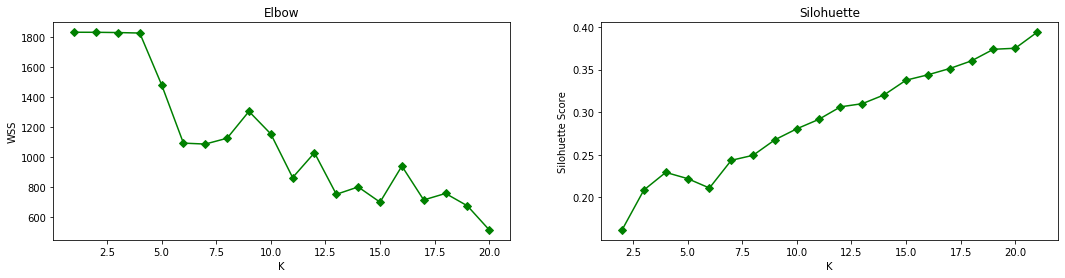

In [120]:
fig = plt.figure(figsize=(18, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

wss=calculate_WSS(df_fans_std, 20)
xwss=list(range(1, 21))
ax1.plot(xwss, wss, '-gD', markevery=1)
ax1.set_xlabel('K')
ax1.set_ylabel('WSS')
ax1.set_title('Elbow')

sil=calculate_SIL(df_fans_std, 21)
xsil=list(range(2, 22))
ax2.plot(xsil, sil, '-gD', markevery=1)
ax2.set_xlabel('K')
ax2.set_ylabel('Silohuette Score')
ax2.set_title('Silohuette')

plt.show()

Text(0, 0.5, 'Inertia')

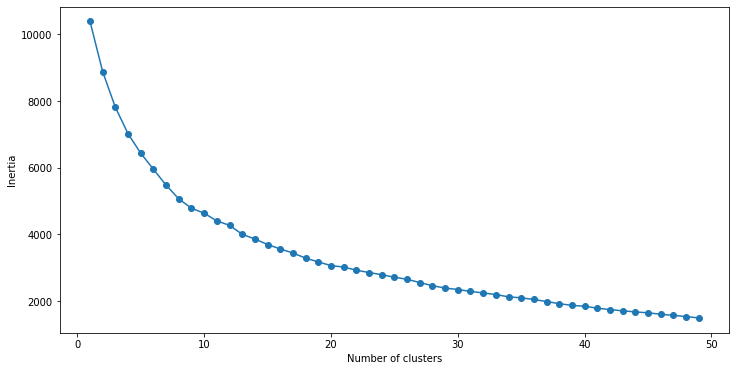

In [121]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,50):
    random = 200
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++', random_state=random)
    kmeans.fit(df_fans_std)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,50), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [122]:
# Based on the above elbow curve, setting the number of clusters as 6 and fit the model:
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(df_fans_std)
pred = kmeans.predict(df_fans_std)

In [123]:
# Let’s look at the value count of points in each of the above-formed clusters:
frame = pd.DataFrame(df_fans_std)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    1460
4    1171
0    1034
5     953
2     927
3     627
Name: cluster, dtype: int64

In [150]:
df_fans_final = pd.DataFrame()
df_fans_final['userId'] = df_fans['userId']
df_fans_final['user_cluster'] = frame['cluster'].to_numpy()
#df_fans_final

In [151]:
df_fans_final['userId'].nunique()

6172

In [152]:
frame['cluster'].count()

6172

In [153]:
frame

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,cluster
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6168,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
6169,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
6170,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [155]:
df_fans_final['user_cluster'].value_counts()

1    1460
4    1171
0    1034
5     953
2     927
3     627
Name: user_cluster, dtype: int64

In [158]:
df_fans_final.to_csv('fans_final.csv', index=True)

## Videos

In [2]:
df_videos = pd.read_csv("videos_clean.csv", sep=',')
df_videos.head()

,Unnamed: 0,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
0,0,2001120,3,362,0,1,0.0,1.0
1,7,2007012,0,90,0,0,1.0,0.0
2,12,2001906,2,1487,0,1,0.0,0.0
3,20,2007078,0,164,0,0,1.0,0.0
4,21,2008579,0,58,0,0,0.0,1.0


In [3]:
seed = 42

In [4]:
df_videos

,Unnamed: 0,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
0,0,2001120,3,362,0,1,0.0,1.0
1,7,2007012,0,90,0,0,1.0,0.0
2,12,2001906,2,1487,0,1,0.0,0.0
3,20,2007078,0,164,0,0,1.0,0.0
4,21,2008579,0,58,0,0,0.0,1.0
...,...,...,...,...,...,...,...,...
2533,64550,2030550,13,5879,0,1,1.0,0.0
2534,64560,2029995,13,170,0,0,1.0,0.0
2535,64626,2038990,7,194,1,0,1.0,0.0
2536,64657,2001063,25,426,0,0,0.0,1.0


In [5]:
df_videos.describe()

,Unnamed: 0,videoId,videoDaysSinceUpload,videoDuration,obert,paid,matches.1,players.1
count,2538.000000,2.538000e+03,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000,2538.000000
mean,29127.280142,1.846635e+06,84.654058,1607.940898,0.069740,0.553191,0.542159,0.227738
std,20495.808900,2.850991e+05,101.988407,2146.118004,0.254758,0.497261,0.498318,0.419456
min,0.000000,7.110110e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10237.500000,1.722276e+06,5.000000,182.000000,0.000000,0.000000,0.000000,0.000000
50%,26922.000000,1.968118e+06,30.000000,547.000000,0.000000,1.000000,1.000000,0.000000
75%,48206.250000,2.014597e+06,142.750000,2406.000000,0.000000,1.000000,1.000000,0.000000
max,64658.000000,2.047460e+06,299.000000,8958.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df_videos_clustering = df_videos[['videoDaysSinceUpload', 'videoDuration', 'obert', 'paid', 'matches.1']]

In [19]:
# Scaling the data for standarization

scaler = MinMaxScaler()
df_videos_std = scaler.fit_transform(df_videos_clustering)
df_videos_std

array([[0.01003344, 0.04041081, 0.        , 1.        , 0.        ],
       [0.        , 0.01004689, 0.        , 0.        , 1.        ],
       [0.00668896, 0.16599687, 0.        , 1.        , 0.        ],
       ...,
       [0.02341137, 0.02165662, 1.        , 0.        , 1.        ],
       [0.08361204, 0.04755526, 0.        , 0.        , 0.        ],
       [0.23076923, 0.03862469, 0.        , 0.        , 0.        ]])

In [20]:
# Defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# Fitting the k means algorithm on standarized data
kmeans.fit(df_videos_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
# Inertia on the fitted data
kmeans.inertia_

1160.7322021576242

In [22]:
# Returns the value of the square of the errors for values of K between 1 and the parameter kmax
def calculate_WSS(points, kmax):
  wss = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_wss = 0
    
    # Calculates square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_wss += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    wss.append(curr_wss)
  return wss

In [23]:
# Returns the "Silohuette score" value for K values between 2 and the kmax parameter. This method requires at least two centroids.
def calculate_SIL(points, kmax):
  sil = []
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    labels = kmeans.labels_
    sil.append(silhouette_score(points, labels, metric = 'euclidean'))  
  return sil

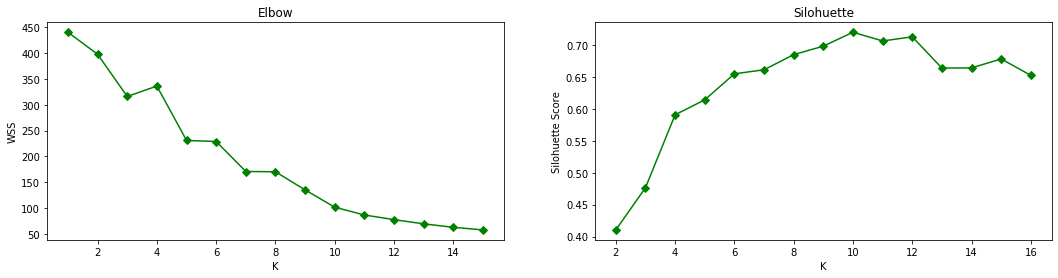

In [24]:
fig = plt.figure(figsize=(18, 4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

wss=calculate_WSS(df_videos_std, 15)
xwss=list(range(1, 16))
ax1.plot(xwss, wss, '-gD', markevery=1)
ax1.set_xlabel('K')
ax1.set_ylabel('WSS')
ax1.set_title('Elbow')

sil=calculate_SIL(df_videos_std, 16)
xsil=list(range(2, 17))
ax2.plot(xsil, sil, '-gD', markevery=1)
ax2.set_xlabel('K')
ax2.set_ylabel('Silohuette Score')
ax2.set_title('Silohuette')

plt.show()

Text(0, 0.5, 'Inertia')

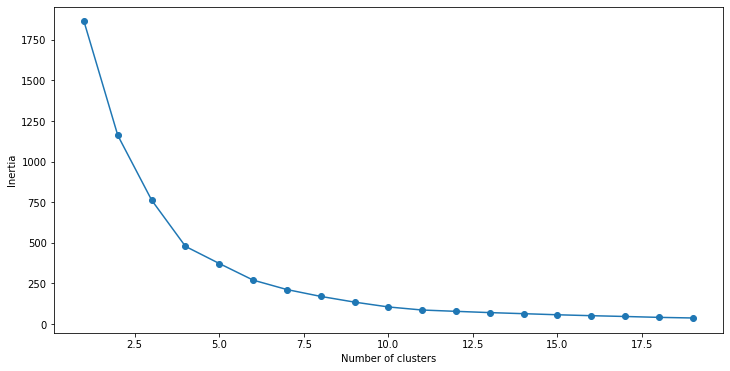

In [25]:
# Fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
clusters_size = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df_videos_std)
    SSE.append(kmeans.inertia_)

# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [30]:
# Based on the above elbow curve, setting the number of clusters as 6 and fit the model:
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(df_videos_std)
pred = kmeans.predict(df_videos_std)

In [31]:
# Let’s look at the value count of points in each of the above-formed clusters:
frame = pd.DataFrame(df_videos_std)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    650
5    377
2    368
0    335
6    324
4    307
3    110
7     67
Name: cluster, dtype: int64

In [32]:
df_videos_final = pd.DataFrame()
#df_videos_final['videoId'] = df_videos['videoId']
#df_videos_final['videoDaysSinceUpload'] = df_videos['videoDaysSinceUpload']
df_videos_final['videoUid'] = df_videos[['videoId', 'videoDaysSinceUpload']].astype(str).agg('_'.join, axis=1)
df_videos_final['user_cluster'] = frame['cluster']
df_videos_final

,videoUid,user_cluster
0,2001120_3,2
1,2007012_0,1
2,2001906_2,2
3,2007078_0,1
4,2008579_0,4
...,...,...
2533,2030550_13,0
2534,2029995_13,1
2535,2038990_7,7
2536,2001063_25,4


In [33]:
df_videos_final.to_csv('videos_final.csv', index=True)